In [7]:
!pip install pandas fiona shapely pyproj rtree

In [8]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 12.0 MB/s eta 0:00:0000:0100:01


In [ ]:
!pip install geopandas

In [ ]:
!pip install topojson

In [31]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 19.7 MB/s eta 0:00:00
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-0c9zqlwc
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-0c9zqlwc
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2617948

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from cartiflette.s3 import download_vectorfile_url_all

In [13]:
a_velo= gpd.read_file('amenagements-velo-en-ile-de-france.geojson')

In [14]:
a_velo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
a_velo.head(10)

,osm_id,nom_com,sens_voit,ag,panneaux,moyenn_ech,revetement,highway,insee_com,nom_voie,longueur,petite_ech,nv,ad,geometry
0,4.014620e+08,Chelles,DOUBLE,NaN,NaN,32,NaN,service,77108,Rue de la Mare Longue Noue,24,3,limite 30,NaN,"LINESTRING (2.60486 48.89065, 2.60460 48.89061..."
1,4.048666e+08,La Queue-en-Brie,NC,chemin service site propre uni,NaN,11,NaN,track,94060,Allée Jacquette,39,1,hors voirie,chemin service site propre uni,"LINESTRING (2.60049 48.77164, 2.60036 48.77198)"
2,1.154304e+09,Lésigny,NC,voie verte uni,NaN,11,asphalt,path,77249,NaN,5,1,hors voirie,voie verte uni,"LINESTRING (2.60844 48.74126, 2.60848 48.74130)"
3,3.300503e+08,Pontault-Combault,UNIQUE,DSC bande,NaN,22,NaN,residential,77373,Rue de la Chaussée,85,2,NaN,NaN,"LINESTRING (2.60422 48.78336, 2.60419 48.78331..."
4,1.104033e+09,Champs-sur-Marne,UNIQUE,NaN,NaN,22,asphalt,residential,77083,Place Pablo Picasso,8,2,NaN,bande uni,"LINESTRING (2.60568 48.84171, 2.60557 48.84170)"
5,3.823147e+07,Pontault-Combault,NC,autre chemin velo uni,NaN,41,asphalt,footway,77373,NaN,175,4,hors voirie,autre chemin velo uni,"LINESTRING (2.60852 48.80017, 2.60844 48.80028..."
6,1.669914e+08,Chelles,UNIQUE,NaN,NaN,22,asphalt,residential,77108,Avenue du Gendarme Castermant,310,2,NaN,bande uni,"LINESTRING (2.60713 48.87821, 2.60683 48.87820..."
7,1.143141e+08,Chelles,UNIQUE,NaN,NaN,22,asphalt,residential,77108,Avenue du Gendarme Castermant,87,2,NaN,bande uni,"LINESTRING (2.60713 48.87812, 2.60745 48.87813..."
8,7.046037e+08,Chelles,DOUBLE,NaN,NaN,32,asphalt,residential,77108,Quai des Mariniers,185,3,limite 30,NaN,"LINESTRING (2.59604 48.86748, 2.59609 48.86747..."
9,1.438193e+08,Mitry-Mory,NC,piste uni,FR:B22a,11,asphalt,cycleway,77294,NaN,471,1,hors voirie,piste uni,"LINESTRING (2.57422 48.99130, 2.57457 48.99142..."


In [20]:
a_velo.shape

(112217, 15)

In [23]:
a_velo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 112217 entries, 0 to 112216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   osm_id      112217 non-null  float64 
 1   nom_com     112217 non-null  object  
 2   sens_voit   112217 non-null  object  
 3   ag          43905 non-null   object  
 4   panneaux    1077 non-null    object  
 5   moyenn_ech  112217 non-null  object  
 6   revetement  73506 non-null   object  
 7   highway     112217 non-null  object  
 8   insee_com   112217 non-null  object  
 9   nom_voie    80231 non-null   object  
 10  longueur    112217 non-null  int64   
 11  petite_ech  112217 non-null  object  
 12  nv          102669 non-null  object  
 13  ad          43695 non-null   object  
 14  geometry    112206 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 12.8+ MB


In [80]:
communes = download_vectorfile_url_all(
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    values = ["75","77","78","91", "92", "93", "94","95"],
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 23.2MiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson



Downloading: : 1.57MiB [00:00, 65.5MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 41.1MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 63.3MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 25.9MiB/s]

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson



Downloading: : 120kiB [00:00, 54.1MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 27.9MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 38.2MiB/s]


In [60]:
communes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
communes.shape

(1287, 15)

In [81]:
communes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1287 entries, 0 to 183
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          1287 non-null   object  
 1   ID          0 non-null      float64 
 2   NOM         1287 non-null   object  
 3   NOM_M       1287 non-null   object  
 4   INSEE_COM   1287 non-null   object  
 5   STATUT      1287 non-null   object  
 6   POPULATION  1287 non-null   int64   
 7   INSEE_CAN   1287 non-null   object  
 8   INSEE_ARR   1287 non-null   object  
 9   INSEE_DEP   1287 non-null   object  
 10  INSEE_REG   1287 non-null   object  
 11  SIREN_EPCI  1287 non-null   object  
 12  source      1287 non-null   object  
 13  INSEE_COG   1287 non-null   object  
 14  geometry    1287 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 160.9+ KB


In [56]:
communes.sample(10)

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,INSEE_COG,geometry
103,COMMUNE_0000000009737928,NaN,Quincy-sous-Sénart,QUINCY-SOUS-SENART,91514,Commune simple,9426,07,2,91,11,200058477,IGN:EXPRESS-COG-CARTO-TERRITOIRE,91514,"POLYGON ((2.51809 48.66050, 2.51800 48.66058, ..."
162,COMMUNE_0000000009734999,NaN,Cuisy,CUISY,77150,Commune simple,455,03,1,77,11,200033090,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77150,"POLYGON ((2.77212 49.02823, 2.77239 49.02811, ..."
366,COMMUNE_0000000009735469,NaN,Sammeron,SAMMERON,77440,Commune simple,1132,06,1,77,11,200090504,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77440,"POLYGON ((3.09930 48.95050, 3.09929 48.95042, ..."
21,COMMUNE_0000000009739696,NaN,Mouy-sur-Seine,MOUY-SUR-SEINE,77325,Commune simple,359,18,3,77,11,200040251,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77325,"POLYGON ((3.21482 48.42067, 3.21451 48.42070, ..."
155,COMMUNE_0000000009736101,NaN,Boissets,BOISSETS,78076,Commune simple,275,02,1,78,11,247800550,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78076,"POLYGON ((1.58678 48.84332, 1.58634 48.84328, ..."
2,COMMUNE_0000002200276623,NaN,Beautheil-Saints,BEAUTHEIL-SAINTS,77433,Commune simple,1992,05,1,77,11,200090504,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77433,"POLYGON ((3.10784 48.73297, 3.10559 48.73301, ..."
307,COMMUNE_0000000009734486,NaN,Saint-Soupplets,SAINT-SOUPPLETS,77437,Commune simple,3224,03,1,77,11,200072130,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77437,"POLYGON ((2.80091 49.01748, 2.80095 49.01755, ..."
152,COMMUNE_0000000009734493,NaN,Longperrier,LONGPERRIER,77259,Commune simple,2331,12,1,77,11,200055655,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77259,"POLYGON ((2.64434 49.06337, 2.64451 49.06351, ..."
504,COMMUNE_0000000009740920,NaN,Garentreville,GARENTREVILLE,77200,Commune simple,117,15,4,77,11,200023240,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77200,"POLYGON ((2.57265 48.24429, 2.57311 48.24434, ..."
430,COMMUNE_0000000009738818,NaN,Boissettes,BOISSETTES,77038,Commune simple,409,20,2,77,11,247700057,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77038,"POLYGON ((2.63200 48.52758, 2.62917 48.52627, ..."


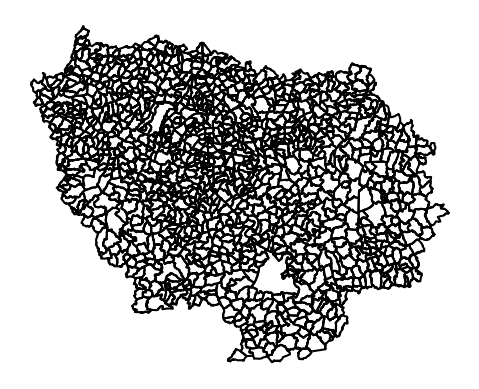

In [63]:
ax = communes.boundary.plot(edgecolor = "k")
ax.set_axis_off()

### Création de la base

La base communes contient des informations sur les communes de l'ile de France tandis que la base a_velo contient des informations sur les aménagements cyclables de toutes la france. Nous allons créer une sous base de cette dernière qui contiendra uniquement les informations qui nous interesse et faire un leftjoin

In [82]:
communes.rename(columns={'INSEE_COM':'insee_com'}, inplace=True)

In [83]:
communes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1287 entries, 0 to 183
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          1287 non-null   object  
 1   ID          0 non-null      float64 
 2   NOM         1287 non-null   object  
 3   NOM_M       1287 non-null   object  
 4   insee_com   1287 non-null   object  
 5   STATUT      1287 non-null   object  
 6   POPULATION  1287 non-null   int64   
 7   INSEE_CAN   1287 non-null   object  
 8   INSEE_ARR   1287 non-null   object  
 9   INSEE_DEP   1287 non-null   object  
 10  INSEE_REG   1287 non-null   object  
 11  SIREN_EPCI  1287 non-null   object  
 12  source      1287 non-null   object  
 13  INSEE_COG   1287 non-null   object  
 14  geometry    1287 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 160.9+ KB


In [79]:
communes.merge(a_velo)

,id,ID,NOM,NOM_M,insee_com,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,...,ag,panneaux,moyenn_ech,revetement,highway,nom_voie,longueur,petite_ech,nv,ad


In [73]:
a_velo

,osm_id,nom_com,sens_voit,ag,panneaux,moyenn_ech,revetement,highway,insee_com,nom_voie,longueur,petite_ech,nv,ad,geometry
0,4.014620e+08,Chelles,DOUBLE,NaN,NaN,32,NaN,service,77108,Rue de la Mare Longue Noue,24,3,limite 30,NaN,"LINESTRING (2.60486 48.89065, 2.60460 48.89061..."
1,4.048666e+08,La Queue-en-Brie,NC,chemin service site propre uni,NaN,11,NaN,track,94060,Allée Jacquette,39,1,hors voirie,chemin service site propre uni,"LINESTRING (2.60049 48.77164, 2.60036 48.77198)"
2,1.154304e+09,Lésigny,NC,voie verte uni,NaN,11,asphalt,path,77249,NaN,5,1,hors voirie,voie verte uni,"LINESTRING (2.60844 48.74126, 2.60848 48.74130)"
3,3.300503e+08,Pontault-Combault,UNIQUE,DSC bande,NaN,22,NaN,residential,77373,Rue de la Chaussée,85,2,NaN,NaN,"LINESTRING (2.60422 48.78336, 2.60419 48.78331..."
4,1.104033e+09,Champs-sur-Marne,UNIQUE,NaN,NaN,22,asphalt,residential,77083,Place Pablo Picasso,8,2,NaN,bande uni,"LINESTRING (2.60568 48.84171, 2.60557 48.84170)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112212,4.390680e+07,12e Arrondissement,UNIQUE,DSC,NaN,31,asphalt,residential,75112,Rue de Pommard,247,3,z30,NaN,"LINESTRING (2.38320 48.83700, 2.38328 48.83694..."
112213,1.343020e+07,12e Arrondissement,DOUBLE,NaN,NaN,32,asphalt,primary,75112,Boulevard de Bercy,99,3,limite 30,NaN,"LINESTRING (2.38402 48.83966, 2.38432 48.83960..."
112214,2.782815e+08,19e Arrondissement,NC,NaN,NaN,41,NaN,pedestrian,75119,Allée des Orgues de Flandre,60,4,rue pietonne,NaN,"LINESTRING (2.37489 48.89024, 2.37514 48.89044..."
112215,2.180484e+07,19e Arrondissement,UNIQUE,NaN,NaN,32,asphalt,residential,75119,Rue Petit,353,3,limite 30,NaN,"LINESTRING (2.37902 48.88463, 2.37967 48.88467..."
